In [3]:
import os
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from PIL import Image
from osgeo import gdal
import matplotlib.pyplot as plt
import tifffile





In [4]:
# Ścieżka do folderu z obrazami
image_path = r"F:\mgr_datasets\multismall\validation_chips\chip_341_10_merged.tif"
image_path_np=r"F:\mgr_datasets\PASTIS_SMOLL\DATA_S2\S2_10002.npy"

In [5]:
# Otwarcie pliku obrazu za pomocą GDAL
dataset = gdal.Open(image_path)

# Sprawdzenie, czy plik obrazu został poprawnie otwarty
if dataset is None:
    print("Nie udało się otworzyć pliku obrazu.")
    exit()

# Pobranie liczby warstw obrazu
num_layers = dataset.RasterCount

# Przekształcenie obrazu do postaci tablicy numpy
image_data = np.zeros((dataset.RasterYSize, dataset.RasterXSize, num_layers), dtype=np.int16)
for i in range(num_layers):
    band = dataset.GetRasterBand(i + 1)
    image_data[:, :, i] = band.ReadAsArray()

# Zamykanie datasetu GDAL
dataset = None
#Klastrowanie pikseli obrazu
pixels = image_data.reshape(-1, num_layers)
num_clusters = 14
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(pixels)
labels = kmeans.predict(pixels)
segmented_image = labels.reshape(image_data.shape[:-1])

# Utwórz obraz z kolorami dla każdego klastra
clustered_image = np.zeros((image_data.shape[0], image_data.shape[1], 3), dtype=np.uint8)
cluster_colors = np.random.randint(0, 255, size=(num_clusters, 3), dtype=np.uint8)

for cluster_id in range(num_clusters):
    clustered_image[segmented_image == cluster_id] = cluster_colors[cluster_id]

-1


c:\Users\wojtek\.conda\envs\gdal\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == "":


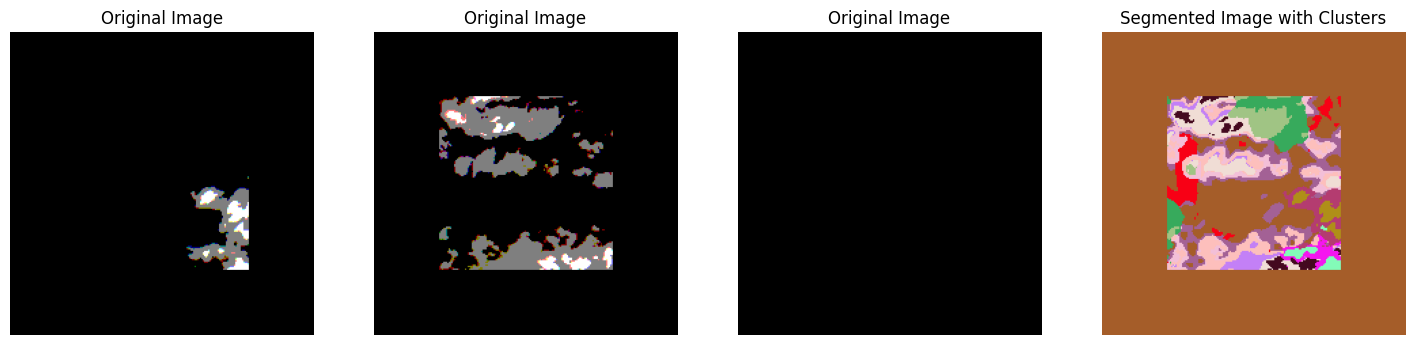

In [6]:
print(np.min(image_data))

przetworzone_obrazy = []

# Tworzymy pętlę dla trzech obrazów
for i in range(3):
    # Wybieramy odpowiednie warstwy dla każdego obrazu
    img = image_data[:, :, i*6:(i*6)+3]
    
    # Normalizujemy wartości pikseli obrazu
    img = img + abs(np.min(img))
    img = ((img) / np.max(img)) * 255
    img = img.astype(np.uint8)
    
    # Dodajemy przetworzony obraz do listy
    przetworzone_obrazy.append(img)

# img1=image_data[:,:,0:3]
# img1=img1+abs(np.min(image_data))
# scaled_image_data = ((img1) / np.max(img1)) * 255
# scaled_image_data = scaled_image_data.astype(np.uint8)

# img=img/2

# ibgr=img[:, :, ::-1]

fig, axes = plt.subplots(1, 4, figsize=(18, 6))
for i in range(3):
    axes[i].imshow(przetworzone_obrazy[i])
    axes[i].axis('off')
    axes[i].set_title('Original Image')# Wyświetl obraz z pokazanymi klastrami


axes[3].imshow(clustered_image)
axes[3].axis('off')
axes[3].set_title('Segmented Image with Clusters')
plt.show()

In [7]:
dataset = gdal.Open(image_path)
band1 = dataset.GetRasterBand(7)
b1=band1.ReadAsArray()

In [8]:

bands_means=np.zeros(16)
bands_mins=np.zeros(16)
bands_maxs=np.zeros(16)
bands_meds=np.zeros(16)
for i in range(1 , 17):
    band=dataset.GetRasterBand(i)
    band_arr=band.ReadAsArray()
    bands_means[i-1]=np.mean(band_arr)
    bands_mins[i-1]=np.min(band_arr)
    bands_maxs[i-1]=np.max(band_arr)
    bands_meds[i-1]=np.median(band_arr)
    

In [9]:
layer=1
np_image=np.load(image_path_np)
testmean=np.mean(np_image[0,layer,:,:])
testmin=np.min(np_image[0,layer,:,:])
testmax=np.max(np_image[0,layer,:,:])


In [10]:
img2=tifffile.imread(r'F:\mgr_datasets\multimoj\validation_chips\chip_340_10.mask.tif')
imgsrc=r'F:\mgr_datasets\PASTIS_SMOLL\ANNOTATIONS\TARGET_10001.npy'
data=np.load(os.path.join(imgsrc))
layer=data[0,:,:]



In [11]:
def counter(img):
    mask=img
    unique_vals=np.unique(mask)
    values=np.zeros(20)
    for value in unique_vals:
        values[value]=np.sum(mask==value)
    
    shape1=mask.shape
    return values/(shape1[0]*shape1[1])*100


In [12]:
vals1=counter(img2)
vals2=counter(layer)

In [13]:
valsdiff=abs(vals1-vals2)
sumvals=np.sum(valsdiff)